# ME:4111 Scientific Computing and Machine Learning 
# HW 9
# by Vivek K

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 1. Use the fruit classification database and select width and height as features to classify orange vs non-orange fruits

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
X = fruits[['height', 'width']].values
y_ = fruits['fruit_label'].values
y = y_==3 # label value for orange

# Split data into training and test, scale data and plot

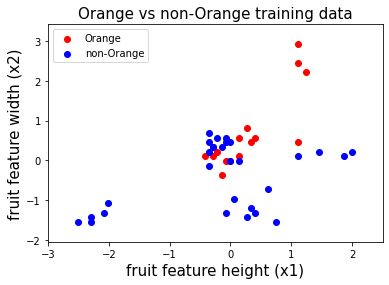

In [3]:
X_train_, X_test_, y_train, y_test = train_test_split(X,y, random_state = 2) # training and test data split 25%
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)
X_test = scaler.transform(X_test_)
x1_min, x1_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
x2_min, x2_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o', c='r', label='Orange')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], marker = 'o', c='b', label='non-Orange')
plt.xlabel('fruit feature height (x1)', size=15)
plt.ylabel('fruit feature width (x2)', size=15)
plt.title('Orange vs non-Orange training data', size= 15)
plt.legend()
plt.show()

# a. Use classifiers: Logistic Regression, Perceptron, LSVC and SVC with RBF kernel

In [4]:
# Choosing hyperparameter gamma_RBF for C=1.0
C_val = 1.0 
gamma_rbf_list = [0.01, 0.05, 0.1, 0.5, 0.6, 0.7, 0.75, 0.8, 1.0, 1.2, 1.3, 1.4, 1.5, 1.75, 2.0, 2.2, 2.5, 2.75, 3.0, 3.2, 3.5, 3.75, 4]
pre_list = []
rec_list = []
f1_list = []
train_acc_list = []
test_acc_list = []
for gamma_RBF_val in gamma_rbf_list:
    clf_RBF = SVC(kernel='rbf', random_state=0, gamma=gamma_RBF_val, C=C_val)
    clf_RBF.fit(X_train, y_train)
    y_predict_RBF = clf_RBF.predict(X_test)
    pre_val = precision_score(y_true=y_test, y_pred=y_predict_RBF)
    re_val = recall_score(y_true=y_test, y_pred=y_predict_RBF)
    f1_val = f1_score(y_true=y_test, y_pred=y_predict_RBF)
    train_acc_val = clf_RBF.score(X_train, y_train)*100
    test_acc_val = clf_RBF.score(X_test, y_test)*100
    train_acc_list.append(train_acc_val)
    test_acc_list.append(test_acc_val)
    rec_list.append(re_val)
    f1_list.append(f1_val)
    pre_list.append(pre_val)
df = pd.DataFrame(list(zip(gamma_rbf_list,train_acc_list, test_acc_list, rec_list, pre_list, f1_list)),
                  columns = ['gamma','training_acc', 'test_acc', 'recall', 'precision', 'f1_score'])
df

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

,gamma,training_acc,test_acc,recall,precision,f1_score
0,0.01,65.909091,73.333333,0.00,0.000000,0.000000
1,0.05,72.727273,73.333333,0.00,0.000000,0.000000
2,0.10,72.727273,73.333333,0.00,0.000000,0.000000
3,0.50,72.727273,73.333333,0.00,0.000000,0.000000
4,0.60,72.727273,73.333333,0.00,0.000000,0.000000
5,0.70,72.727273,73.333333,0.00,0.000000,0.000000
6,0.75,75.000000,73.333333,0.00,0.000000,0.000000
7,0.80,77.272727,73.333333,0.00,0.000000,0.000000
8,1.00,81.818182,66.666667,0.00,0.000000,0.000000
9,1.20,84.090909,73.333333,0.25,0.500000,0.333333


In [5]:
gamma_RBF = 1.5
C_val = 1.0 # Default value
clf_LR = LogisticRegression(C=C_val).fit(X_train, y_train)
clf_P = Perceptron(tol=1e-3, max_iter=10000, random_state=0)
clf_P.fit(X_train, y_train)
clf_LSVC = LinearSVC(C=C_val, max_iter=100000)
clf_LSVC.fit(X_train, y_train)
clf_RBF = SVC(kernel='rbf', random_state=0, gamma=gamma_RBF, C=C_val)
clf_RBF.fit(X_train, y_train)

SVC(gamma=1.5, random_state=0)

# b. Plot decision boundary/regions for each classifier

In [6]:
x1_plot = np.arange(x1_min, x1_max, (x1_max-x1_min)/100.0)
x1_plot = x1_plot.reshape(-1, 1)
LR_plot = -(clf_LR.coef_[0,0]*x1_plot + clf_LR.intercept_[0])/clf_LR.coef_[0,1]
P_plot = -(clf_P.coef_[0,0]*x1_plot + clf_P.intercept_[0])/clf_P.coef_[0,1]
LSVC_plot = -(clf_LSVC.coef_[0,0]*x1_plot + clf_LSVC.intercept_[0])/clf_LSVC.coef_[0,1]

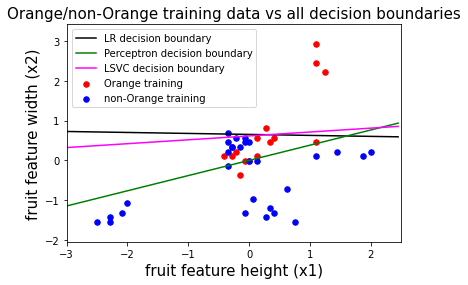

In [7]:
plt.plot(x1_plot, LR_plot, '-', c='black', label='LR decision boundary')
plt.plot(x1_plot, P_plot, '-', c='green', label='Perceptron decision boundary')
plt.plot(x1_plot, LSVC_plot, '-', c='magenta', label='LSVC decision boundary')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o', c='r', s=30, label='Orange training')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], marker = 'o', c='b', s=30, label='non-Orange training')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.title('Orange/non-Orange training data vs all decision boundaries', size=15)
plt.xlabel('fruit feature height (x1)', size=15)
plt.ylabel('fruit feature width (x2)', size=15)
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

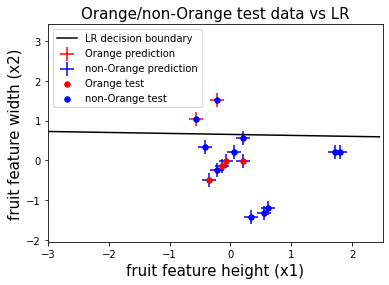

In [8]:
y_predict = clf_LR.predict(X_test)
plt.plot(x1_plot, LR_plot, '-', c='black', label='LR decision boundary')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.scatter(X_test[y_predict==1,0],X_test[y_predict==1,1], marker = '+', c='r', s=200, label='Orange prediction')
plt.scatter(X_test[y_predict==0,0],X_test[y_predict==0,1], marker = '+', c='b', s=200, label='non-Orange prediction')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker = 'o', c='r', s=30, label='Orange test')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1], marker = 'o', c='b', s=30, label='non-Orange test')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.title('Orange/non-Orange test data vs LR', size=15)
plt.xlabel('fruit feature height (x1)', size=15)
plt.ylabel('fruit feature width (x2)', size=15)
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

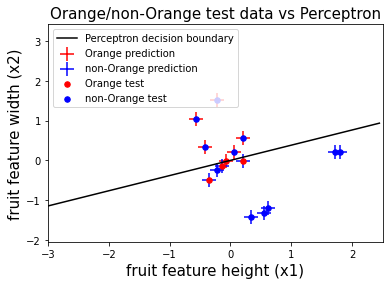

In [9]:
y_predict = clf_P.predict(X_test)
plt.plot(x1_plot, P_plot, '-', c='black', label='Perceptron decision boundary')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.scatter(X_test[y_predict==1,0],X_test[y_predict==1,1], marker = '+', c='r', s=200, label='Orange prediction')
plt.scatter(X_test[y_predict==0,0],X_test[y_predict==0,1], marker = '+', c='b', s=200, label='non-Orange prediction')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker = 'o', c='r', s=30, label='Orange test')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1], marker = 'o', c='b', s=30, label='non-Orange test')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.title('Orange/non-Orange test data vs Perceptron', size=15)
plt.xlabel('fruit feature height (x1)', size=15)
plt.ylabel('fruit feature width (x2)', size=15)
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

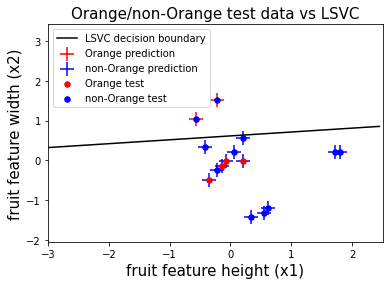

In [10]:
y_predict = clf_LSVC.predict(X_test)
plt.plot(x1_plot, LSVC_plot, '-', c='black', label='LSVC decision boundary')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.scatter(X_test[y_predict==1,0],X_test[y_predict==1,1], marker = '+', c='r', s=200, label='Orange prediction')
plt.scatter(X_test[y_predict==0,0],X_test[y_predict==0,1], marker = '+', c='b', s=200, label='non-Orange prediction')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker = 'o', c='r', s=30, label='Orange test')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1], marker = 'o', c='b', s=30, label='non-Orange test')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.title('Orange/non-Orange test data vs LSVC', size=15)
plt.xlabel('fruit feature height (x1)', size=15)
plt.ylabel('fruit feature width (x2)', size=15)
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

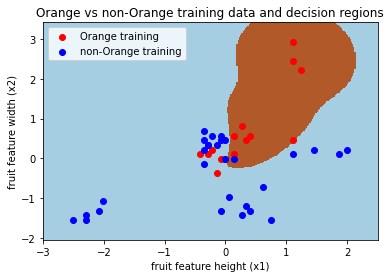

In [11]:
plt.figure()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
h = .02
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = clf_RBF.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o', c='r', label='Orange training')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], marker = 'o', c='b', label='non-Orange training')
plt.title('Orange vs non-Orange training data and decision regions')
plt.xlabel('fruit feature height (x1)')
plt.ylabel('fruit feature width (x2)')
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

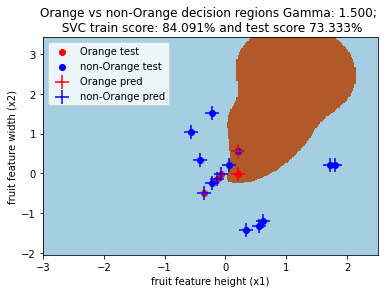

In [12]:
y_pred = clf_RBF.predict(X_test)
plt.figure()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker = 'o', c='r', label='Orange test')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1], marker = 'o', c='b', label='non-Orange test')
plt.scatter(X_test[y_pred==1,0],X_test[y_pred==1,1], marker = '+', c='r', s=200, label='Orange pred')
plt.scatter(X_test[y_pred==0,0],X_test[y_pred==0,1], marker = '+', c='b', s=200, label='non-Orange pred')
plt.title('Orange vs non-Orange decision regions Gamma: {:.3f}; \n SVC train score: {:.3f}% and test score {:.3f}%'
          .format(gamma_RBF, clf_RBF.score(X_train, y_train)*100, clf_RBF.score(X_test, y_test)*100))
plt.xlabel('fruit feature height (x1)')
plt.ylabel('fruit feature width (x2)')
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

# c. Obtain the confusion matrix and calculate the PRE, REC and Accuracy of each classifier

In [13]:
y_predict_LR = clf_LR.predict(X_test)
confmat_LR = confusion_matrix(y_true=y_test, y_pred=y_predict_LR)
print("Confusion Matrix for LR below")
print(confmat_LR)
print('Precision for LR: %.3f' % precision_score(y_true=y_test, y_pred=y_predict_LR))
print('Recall for LR: %.3f' % recall_score(y_true=y_test, y_pred=y_predict_LR))
print('F1 score for LR: %.3f' % f1_score(y_true=y_test, y_pred=y_predict_LR))
print('Accuracy of LR classifier on training set: {:.2f}%'
     .format(clf_LR.score(X_train, y_train)*100))
print('Accuracy of LR classifier on test set: {:.2f}%'
     .format(clf_LR.score(X_test, y_test)*100))

Confusion Matrix for LR below
[[9 2]
 [4 0]]
Precision for LR: 0.000
Recall for LR: 0.000
F1 score for LR: 0.000
Accuracy of LR classifier on training set: 72.73%
Accuracy of LR classifier on test set: 60.00%


In [14]:
y_predict_P = clf_P.predict(X_test)
confmat_P = confusion_matrix(y_true=y_test, y_pred=y_predict_P)
print("Confusion Matrix for Perceptron below")
print(confmat_P)
print('Precision for Perceptron: %.3f' % precision_score(y_true=y_test, y_pred=y_predict_P))
print('Recall for Perceptron: %.3f' % recall_score(y_true=y_test, y_pred=y_predict_P))
print('F1 score for Perceptron: %.3f' % f1_score(y_true=y_test, y_pred=y_predict_P))
print('Accuracy of Perceptron classifier on training set: {:.2f}%'
     .format(clf_P.score(X_train, y_train)*100))
print('Accuracy of Perceptron classifier on test set: {:.2f}%'
     .format(clf_P.score(X_test, y_test)*100))

Confusion Matrix for Perceptron below
[[6 5]
 [3 1]]
Precision for Perceptron: 0.167
Recall for Perceptron: 0.250
F1 score for Perceptron: 0.200
Accuracy of Perceptron classifier on training set: 72.73%
Accuracy of Perceptron classifier on test set: 46.67%


In [15]:
y_predict_LSVC = clf_LSVC.predict(X_test)
confmat_LSVC = confusion_matrix(y_true=y_test, y_pred=y_predict_LSVC)
print("Confusion Matrix for LSVC below")
print(confmat_LSVC)
print('Precision for LSVC: %.3f' % precision_score(y_true=y_test, y_pred=y_predict_LSVC))
print('Recall for LSVC: %.3f' % recall_score(y_true=y_test, y_pred=y_predict_LSVC))
print('F1 score for LSVC: %.3f' % f1_score(y_true=y_test, y_pred=y_predict_LSVC))
print('Accuracy of LSVC classifier on training set: {:.2f}%'
     .format(clf_LSVC.score(X_train, y_train)*100))
print('Accuracy of LSVC classifier on test set: {:.2f}%'
     .format(clf_LSVC.score(X_test, y_test)*100))

Confusion Matrix for LSVC below
[[9 2]
 [4 0]]
Precision for LSVC: 0.000
Recall for LSVC: 0.000
F1 score for LSVC: 0.000
Accuracy of LSVC classifier on training set: 72.73%
Accuracy of LSVC classifier on test set: 60.00%


In [16]:
y_predict_RBF = clf_RBF.predict(X_test)
confmat_RBF = confusion_matrix(y_true=y_test, y_pred=y_predict_RBF)
print("Confusion Matrix for SVF with RBF kernel below")
print(confmat_RBF)
print('Precision for SVF with RBF kernel: %.3f' % precision_score(y_true=y_test, y_pred=y_predict_RBF))
print('Recall for SVF with RBF kernel: %.3f' % recall_score(y_true=y_test, y_pred=y_predict_RBF))
print('F1 score for SVF with RBF kernel: %.3f' % f1_score(y_true=y_test, y_pred=y_predict_RBF))
print('Accuracy of SVF with RBF kernel classifier on training set: {:.2f}%'
     .format(clf_RBF.score(X_train, y_train)*100))
print('Accuracy of SVF with RBF kernel classifier on test set: {:.2f}%'
     .format(clf_RBF.score(X_test, y_test)*100))

Confusion Matrix for SVF with RBF kernel below
[[10  1]
 [ 3  1]]
Precision for SVF with RBF kernel: 0.500
Recall for SVF with RBF kernel: 0.250
F1 score for SVF with RBF kernel: 0.333
Accuracy of SVF with RBF kernel classifier on training set: 84.09%
Accuracy of SVF with RBF kernel classifier on test set: 73.33%


# d. Compare and discuss the results

**The following choice of hyperparameters was made:** <br>
C = 1.0 for LR (Default value stated in sklearn documentation) <br>
C = 1.0 for LSVC and SVC with RBF kernel (Again, Default value stated in sklearn documentation) <br>
<br>
gamma_RBF = 1.5 (Based on looping over values from 0.01 to 4.0 and choosing a conservative estimate which did not seem to overfit, gave a decent training and test accuracy and had non-zero f1, precision and recall scores)<br>
<br>
tol=1e-3, max_iter=10000 for Perceptron (Value selected to ensure convergence of solution for given tolerance)<br>
max_iter=100000 for LSVC (Value selected to ensure convergence of solution for given tolerance)<br>
<br>
<br>
**The following results were obtained:** <br>
The metrics for LR and LSVC were exactly the same. We can expect this since the hinge loss function and LR loss function have very similar behavior. <br>
The precision, recall and F1 score are zero for both the LR and the LSVC algorithms since they both were not able to classify any actual oranges from the test data set as oranges. <br>
<br>
The perceptron performed differently as compared to the LR and LSVC algorithms. It had a lower accuracy on the test data but it was able to correctly classify at least one orange from the test data set leading to non-zero values for precision, recall and F1 scores. <br>
<br>
The SVC with RBF kernel outperformed all the linear algorithms by obtaining higher accuracy on test data, training data and better recall and F1 scores than the perceptron. This is to be expected as the data does not appear to be linearly seperable on visually inspecting the feature space. The hyperparameter gamma was tuned to obtain the result just described for the value of hyperparameter C fixed at 1.0 unit